# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 
api_keys = weather_api_key
appid = api_keys
settings = {"units": "metric", "appid": api_keys}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_keys}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | meadow lake
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | buala
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | faya
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | macamic
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | buraydah
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | la palma
Processing Record 21 of Set 1 | lav

Processing Record 35 of Set 4 | amritsar
Processing Record 36 of Set 4 | nurota
Processing Record 37 of Set 4 | sulangan
Processing Record 38 of Set 4 | kumbo
Processing Record 39 of Set 4 | nampa
Processing Record 40 of Set 4 | ahumada
City not found. Skipping...
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | antsohihy
Processing Record 43 of Set 4 | sungaipenuh
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | muravlenko
Processing Record 46 of Set 4 | hailar
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | katangli
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | bontang
Processing Record 5 of Set 5 | hofn
Processing Record 6 of Set 5 | gwadar
Processing Record 7 of Set 5 | pochutla
Processing Record 8 of Set 5 | 

Processing Record 26 of Set 8 | nelson bay
Processing Record 27 of Set 8 | mithi
Processing Record 28 of Set 8 | hurghada
Processing Record 29 of Set 8 | sayaxche
Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | umm kaddadah
Processing Record 32 of Set 8 | virginia beach
Processing Record 33 of Set 8 | cukai
Processing Record 34 of Set 8 | blackwater
Processing Record 35 of Set 8 | kamen-rybolov
Processing Record 36 of Set 8 | epe
Processing Record 37 of Set 8 | puerto escondido
Processing Record 38 of Set 8 | khatanga
Processing Record 39 of Set 8 | aripuana
Processing Record 40 of Set 8 | mutis
Processing Record 41 of Set 8 | kununurra
Processing Record 42 of Set 8 | salinopolis
Processing Record 43 of Set 8 | bequimao
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | norton shores
Processing Record 46 of Set 8 | gigmoto
Processing Record 47 of Set 8 | huambo
Processing Record 48 of Set 8 | carlisle
Processing Record 49 of Set 8 |

Processing Record 13 of Set 12 | bijie
Processing Record 14 of Set 12 | maloy
Processing Record 15 of Set 12 | zachary
Processing Record 16 of Set 12 | high level
Processing Record 17 of Set 12 | severobaykalsk
Processing Record 18 of Set 12 | challans
Processing Record 19 of Set 12 | cayenne
Processing Record 20 of Set 12 | kamaishi
Processing Record 21 of Set 12 | atbasar
Processing Record 22 of Set 12 | hay river
Processing Record 23 of Set 12 | alta floresta
Processing Record 24 of Set 12 | ajdabiya
Processing Record 25 of Set 12 | fortuna
Processing Record 26 of Set 12 | rungata
City not found. Skipping...
Processing Record 27 of Set 12 | hitachi
Processing Record 28 of Set 12 | sept-iles
Processing Record 29 of Set 12 | harper
Processing Record 30 of Set 12 | panguna
Processing Record 31 of Set 12 | marystown
Processing Record 32 of Set 12 | valente
Processing Record 33 of Set 12 | ust-ishim
Processing Record 34 of Set 12 | dauphin
Processing Record 35 of Set 12 | zacatepec
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,22.03,83,75,6.69,CK,1667296547
1,meadow lake,34.8014,-106.5436,10.22,39,0,2.07,US,1667296548
2,paamiut,61.9940,-49.6678,-1.19,72,95,11.24,GL,1667296549
3,hithadhoo,-0.6000,73.0833,27.74,77,67,6.87,MV,1667296550
4,geraldton,-28.7667,114.6000,19.23,63,0,9.77,AU,1667296511


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,22.03,83,75,6.69,CK,1667296547
1,meadow lake,34.8014,-106.5436,10.22,39,0,2.07,US,1667296548
2,paamiut,61.9940,-49.6678,-1.19,72,95,11.24,GL,1667296549
3,hithadhoo,-0.6000,73.0833,27.74,77,67,6.87,MV,1667296550
4,geraldton,-28.7667,114.6000,19.23,63,0,9.77,AU,1667296511


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

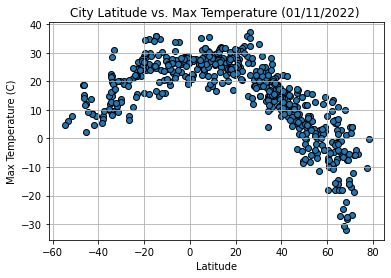

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat vs. Temp Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

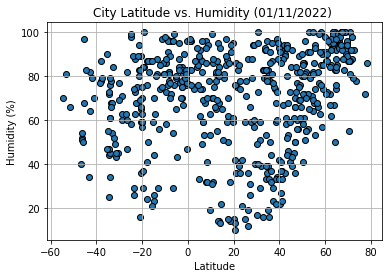

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat vs. Hum Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

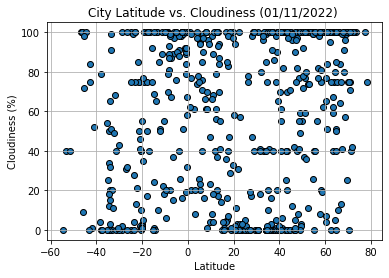

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat vs. Cloud Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

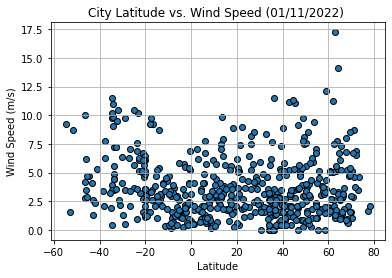

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat vs. Wind Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the scatterplot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,meadow lake,34.8014,-106.5436,10.22,39,0,2.07,US,1667296548
2,paamiut,61.9940,-49.6678,-1.19,72,95,11.24,GL,1667296549
6,jamestown,42.0970,-79.2353,14.77,94,100,2.06,US,1667296552
7,hambantota,6.1241,81.1185,30.19,74,40,7.72,LK,1667296553
10,faya,18.3851,42.4509,25.06,32,29,4.03,SA,1667296556


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,22.03,83,75,6.69,CK,1667296547
3,hithadhoo,-0.6000,73.0833,27.74,77,67,6.87,MV,1667296550
4,geraldton,-28.7667,114.6000,19.23,63,0,9.77,AU,1667296511
5,punta arenas,-53.1500,-70.9167,6.06,81,40,1.54,CL,1667296551
8,buala,-8.1450,159.5921,26.91,82,93,1.23,SB,1667296554


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7417622231514788


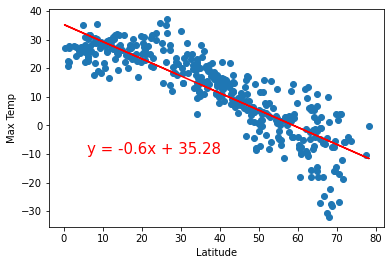

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,-10))

The r-value is: 0.4808132078598376


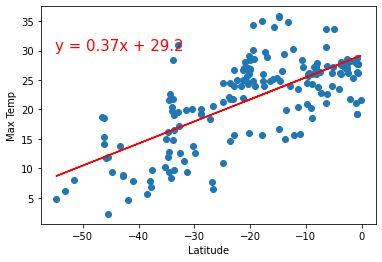

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,30))


**Discussion about the linear relationship: In the northern hemisphere it is incidated that nearer the equator (Latitude = 0) the max temp is higher.
The southern hemisphere has the same outcome.
R-values are 0.741 and 0.48 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07969727227503016


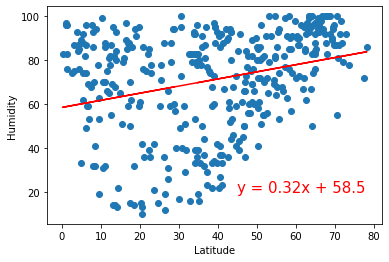

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,20))


The r-value is: 0.07031908840032226


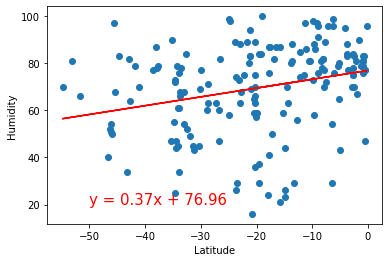

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

**Discussion about the linear relationship: In the northern hemisphere the humidity trend appears reasonably consistent with a very slight increase at the north most point.
This appears similiar for the southern hemisphere plot where the humidty increases marginally


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.039295067305468806


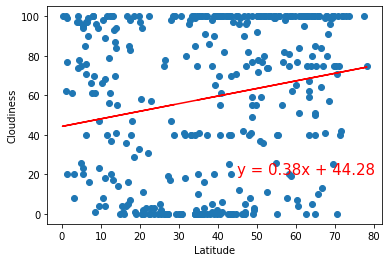

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(45,20))


The r-value is: 0.10336925485804103


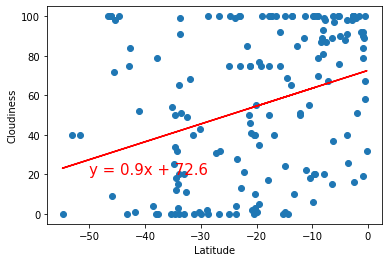

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,20))

**Discussion about the linear relationship: Looking at the northern hemisphere, there is minimal correlation bewteen latitude and cloudiness, with an approximate 10% increase across the plot latitude.
Southern hemisphere appears to have a higher relationship of cloudiness vs latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009907184501101342


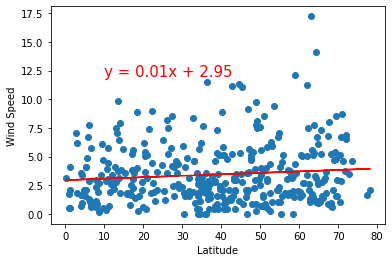

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,12))


The r-value is: 0.15948630384485626


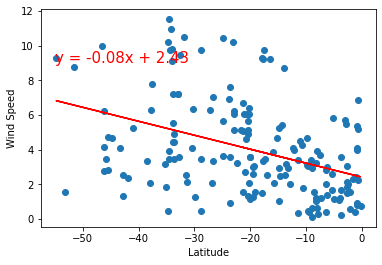

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,9))

**Discussion about the linear relationship:** In the Northern Hemisphere, there appears to be no relationship occurring between wind speed & latitude with the r-value being 0.009.
The Southern Hemisphere statistics show marginal relationship as it moves away from the equator, with an r-value at 0.159